In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import pickle
import numpy as np
import networkx as nx

## Basic 4x4 grid

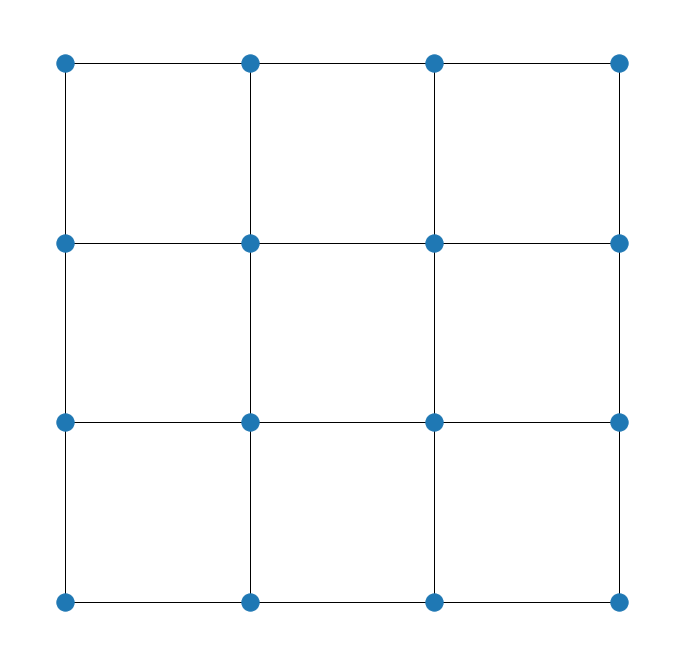

In [9]:
size = 4
G = nx.grid_graph(dim=(size, size))
for e in G.edges():
    G.edges[e]["cost"] = lambda x: 1 + x / 100

positions = {node: node for node in G.nodes()}

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(G, pos=positions, ax=ax)
# plt.savefig("empty_grid.png")
plt.show()

In [10]:
nx.write_adjlist(G, "4x4_grid.adjlist")

## Make the Braess Grid

In [11]:
edge_list = [edge for edge in G.edges]

In [5]:
dG = nx.DiGraph(incoming_graph_data=edge_list)

dG.add_edge((0, 1), (1, 0), cost= lambda x: 0)
dG.add_edge((0, 2), (1, 1), cost= lambda x: 0)
dG.add_edge((0, 3), (1, 2), cost= lambda x: 0)
dG.add_edge((1, 1), (2, 0), cost= lambda x: 0)
dG.add_edge((1, 2), (2, 1), cost= lambda x: 0)
dG.add_edge((1, 3), (2, 2), cost= lambda x: 0)
dG.add_edge((2, 1), (3, 0), cost= lambda x: 0)
dG.add_edge((2, 2), (3, 1), cost= lambda x: 0)
dG.add_edge((2, 3), (3, 2), cost= lambda x: 0)

In [13]:
for node in dG.nodes():
    edges = dG.edges(node)
    for edge in edges:
        if edge[1][0] == edge[0][0] + 1:
            # set cost to variable
            dG.edges[edge]["cost"] = lambda x: x / 100
        elif edge[1][1] == edge[0][1] + 1:
            # set cost to fixed
            dG.edges[edge]["cost"] = lambda x: 1

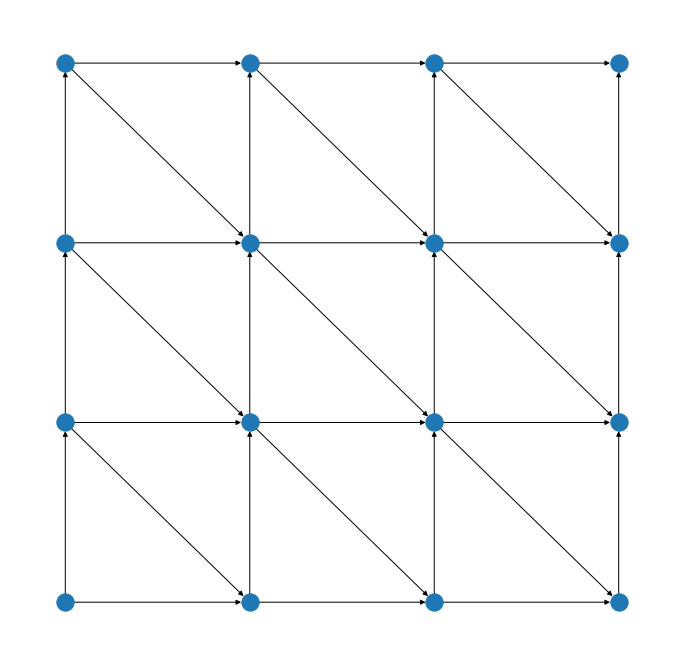

In [14]:
positions = {node: node for node in dG.nodes()}
fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(dG, pos=positions, ax=ax)
# plt.savefig("empty_grid.png")
plt.show()

In [19]:
nx.write_adjlist(dG, "braess_grid.adjlist", delimiter=";")

## Make the Random Cost Grid

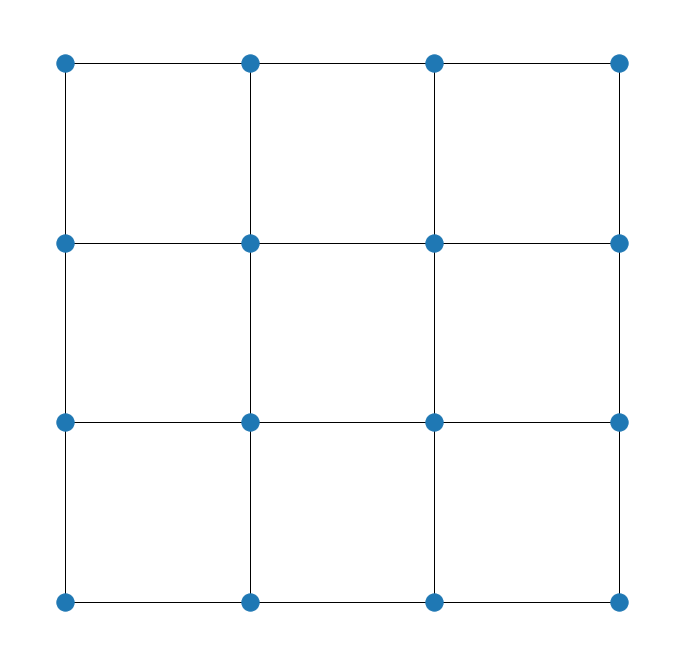

In [17]:
size = 4
rG = nx.grid_graph(dim=(size, size))
for e in rG.edges():
    rG.edges[e]["cost"] = lambda x: np.random.random() + x / 100

positions = {node: node for node in G.nodes()}

fig, ax = plt.subplots(figsize=(12, 12))
nx.draw(rG, pos=positions, ax=ax)
# plt.savefig("empty_grid.png")
plt.show()

In [18]:
nx.write_adjlist(rG, "random_grid.adjlist")